In [12]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

                                             geometry
0   POLYGON ((-118.184 33.768, -118.184 33.767, -1...
1   POLYGON ((-118.185 33.772, -118.185 33.771, -1...
2   POLYGON ((-118.181 33.782, -118.181 33.781, -1...
3   POLYGON ((-118.181 33.789, -118.181 33.788, -1...
4   POLYGON ((-118.181 33.807, -118.181 33.806, -1...
..                                                ...
91  POLYGON ((-117.995 34.133, -117.995 34.132, -1...
92  POLYGON ((-117.959 34.133, -117.959 34.132, -1...
93  POLYGON ((-117.924 34.129, -117.924 34.128, -1...
94  POLYGON ((-117.898 34.136, -117.898 34.135, -1...
95  POLYGON ((-117.883 34.137, -117.883 34.136, -1...

[96 rows x 1 columns]


/tmp/ipykernel_4675/2696327039.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_points = metro.geometry.buffer(buffer_distance)


<Axes: >

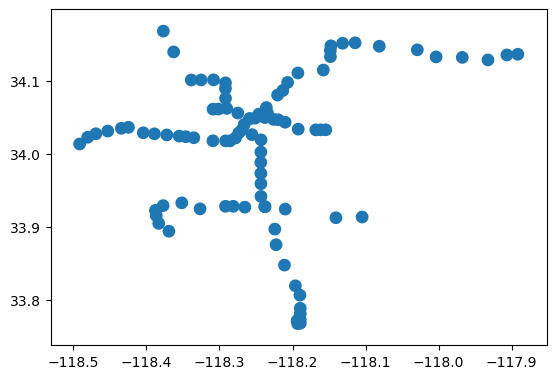

In [7]:
metro = gpd.read_file('Data/Stations_All_0316.zip', crs='epsg:3857')

# Create a buffer around the points
buffer_distance = 0.8/92  # Specify the buffer distance in the desired unit
buffered_points = metro.geometry.buffer(buffer_distance)

# Add the buffered points to a new GeoDataFrame
buffered_points_gdf = gpd.GeoDataFrame(geometry=buffered_points)

# Set the CRS of the buffered points GeoDataFrame
buffered_points_gdf.crs = 'EPSG:3857'  # Replace 'EPSG:4326' with the desired CRS

# Print the buffered points
print(buffered_points_gdf)
buffered_points_gdf.plot()

In [4]:
import folium 

# Create a folium map
m = folium.Map(location=[34.2, -118.2],
              zoom_start = 9,
              titles='CartoDB positron',
              attribution='CartoDB')

# Add the polygons to the map
folium.GeoJson(buffered_points).add_to(m)
m

<Axes: >

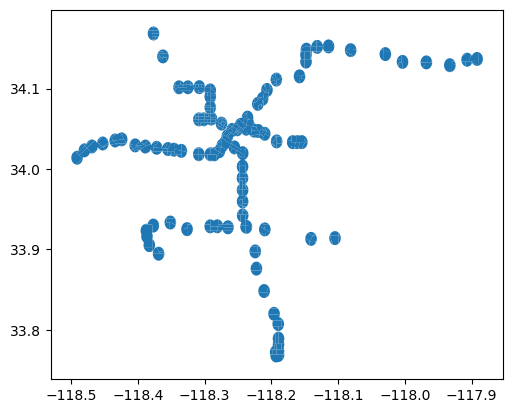

In [8]:
import geopandas as gpd
tracts = gpd.read_file('Data/Census_Tracts_2020.geojson', crs='epsg:3857')
tracts_clip = gpd.clip(tracts, buffered_points)
tracts_clip.plot()

In [6]:
import folium 

# Create a folium map
m = folium.Map(location=[34.2, -118.2],
              zoom_start = 9,
              titles='CartoDB positron',
              attribution='CartoDB')

# Add the polygons to the map
folium.GeoJson(tracts_clip).add_to(m)
m

In [13]:
lu = gpd.read_file('Data/LandUse.zip', crs='epsg:3857')
lu_clip = gpd.clip(lu, buffered_points)
lu_clip.plot()

DriverError: '/vsizip/Data/LandUse.zip' does not exist in the file system, and is not recognized as a supported dataset name.